# TensorFlow Neural Network

This code significantly overlaps with the code from Project 5: Image Classification, in another [GitHub folder](https://github.com/dangall/Udacity-Machine-Learning-Nanodegree/blob/master/P5_image_classification/image_classification.ipynb).

In [1]:
import tensorflow as tf

import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Image shape: (150, 150, 3)


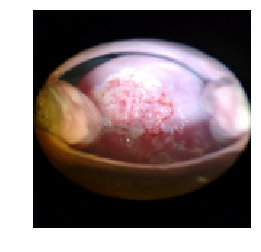

In [2]:
def load_training_data(batch_number, image_numbers=[]):
    """
    Loads the training data from files. It is possible to specify an interval 
    of images to load, or by defauly load th entire batch.
    """
    if image_numbers == []:
        return np.load("./TensorFlow_data/training_data/training_images_batch" + str(batch_number) + ".npy")
    else:
        return np.load("./TensorFlow_data/training_data/training_images_batch" + str(batch_number) + ".npy")[image_numbers]
    
def load_training_labels(batch_number, image_numbers=[]):
    """
    Loads the training data from files. It is possible to specify an interval 
    of images to load, or by defauly load th entire batch.
    """
    if image_numbers == []:
        return np.load("./TensorFlow_data/training_data/training_labels_batch" + str(batch_number) + ".npy")
    else:
        return np.load("./TensorFlow_data/training_data/training_labels_batch" + str(batch_number) + ".npy")[image_numbers]

def display_image(imagearray):
    array_to_plot = imagearray
    print("Image shape: {}".format(imagearray.shape))
    plt.imshow(array_to_plot)
    plt.axis("off")
    plt.show()

display_image(load_training_data(0)[19])

### Set up functions necessary to build the neural network

#### Input

In [3]:
def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    return tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], image_shape[2]], name="x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, [None, n_classes], name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    """
    return tf.placeholder(tf.float32, name="keep_prob")

#### Convolution and Max Pooling

In [4]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """    
    # Number of input colors
    num_inputcolors = x_tensor.shape.as_list()[3]
    
    # Convolutional filter
    W_conv= tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1], num_inputcolors, conv_num_outputs], stddev=0.1))
    b_conv = tf.Variable(tf.constant(0.1, shape=[conv_num_outputs]))
    
    convolution = tf.nn.conv2d(x_tensor, W_conv, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    h_conv = tf.nn.relu(convolution + b_conv)
    
    h_pool = tf.nn.max_pool(h_conv, ksize=[1, pool_ksize[0], pool_ksize[1], 1], 
                            strides=[1, pool_strides[0], pool_strides[1], 1], padding='SAME')
    
    return h_pool 

#### Flatten Layer

In [5]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """    
    flat_dimension = np.prod(x_tensor.shape.as_list()[1:])
    x_flat = tf.reshape(x_tensor, [-1, flat_dimension])

    return x_flat

#### Fully-Connected Layer

In [6]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """    
    input_dimensions = x_tensor.shape.as_list()[1]    
    W = tf.Variable(tf.truncated_normal([input_dimensions, num_outputs], stddev=0.1))
    b = tf.Variable(tf.constant(0.1, shape=[num_outputs]))
    
    h_connected = tf.nn.relu(tf.matmul(x_tensor, W) + b)
    
    return h_connected

#### Output Layer

In [7]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    input_dimensions = x_tensor.shape.as_list()[1]    
    W = tf.Variable(tf.truncated_normal([input_dimensions, num_outputs], stddev=0.1))
    b = tf.Variable(tf.constant(0.1, shape=[num_outputs]))
    
    h_output = tf.matmul(x_tensor, W) + b 
    
    return h_output

### Build Convolutional Neural Network

In [8]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    convlayer_1 = tf.nn.dropout(conv2d_maxpool(x, 20, (4, 4), (1, 1), (2, 2), (2, 2)), keep_prob)
    #convlayer_1b = tf.nn.dropout(conv2d_maxpool(convlayer_1, 10, (4, 4), (1, 1), (2, 2), (1, 1)), keep_prob)
    
    convlayer_2 = tf.nn.dropout(conv2d_maxpool(convlayer_1, 30, (4, 4), (1, 1), (2, 2), (2, 2)), keep_prob)
    #convlayer_2b = conv2d_maxpool(convlayer_2, 20, (1, 1), (1, 1), (1, 1), (1, 1))
    
    #convlayer_3 = tf.nn.dropout(conv2d_maxpool(convlayer_2, 60, (4, 4), (1, 1), (2, 2), (2, 2)), keep_prob)
    #convlayer_3b = conv2d_maxpool(convlayer_3, 50, (1, 1), (1, 1), (1, 1), (1, 1))

    # Function Definition from Above:
    #   flatten(x_tensor)
    flattened_tensor = flatten(convlayer_2)
    
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    connlayer_1 = tf.nn.dropout(fully_conn(flattened_tensor, 100), keep_prob) #200 earlier
    
    connlayer_2 = tf.nn.dropout(fully_conn(connlayer_1, 30), keep_prob)
    
    #connlayer_3 = tf.nn.dropout(fully_conn(connlayer_2, 30), keep_prob)
    
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    outputlayer = output(connlayer_2, 3)

    return outputlayer

#=============================
#  Build the Neural Network
#=============================

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((150, 150, 3))
y = neural_net_label_input(3)
keep_prob = neural_net_keep_prob_input()

# Model
#logits = conv_net(x, keep_prob)
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

### Train the neural network

#### Hyperparameters

In [9]:
epochs = 50
keep_probability = 0.5
learning_rate = 0.001 # default is 0.001 N.B. it is also possible to make this a placeholder object!
size_of_minibatch = 2**6

#===============================
# Don't need to edit below this
#===============================

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

#### Print cost and accuracy

In [10]:
tensorflow_folder = "./TensorFlow_data"
training_subfolder = "/training_data"
training_folder = tensorflow_folder + training_subfolder
num_saved_batches = sum(["training_images_batch" in filename 
                         for filename in list(os.walk(training_folder))[0][2]])

# The final batch will be our validation set
validation_inputarray = load_training_data(num_saved_batches - 1)
validation_labels = load_training_labels(num_saved_batches - 1)

def get_stats(session, feature_batch, label_batch, cost, accuracy, printout=True):
    """
    Obtain information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    training_cost_value = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob:1.0})
    validation_cost_value = session.run(cost, feed_dict={x: validation_inputarray,
                                                         y: validation_labels, keep_prob:1.0})
    accuracy_value = session.run(accuracy, feed_dict={x: validation_inputarray, 
                                                      y: validation_labels, keep_prob:1.0})
    if printout:
        print("\nTraining Loss: {}".format(training_cost_value))
        print("Validation Loss: {}".format(validation_cost_value))
        print("Accuracy (validation): {}".format(accuracy_value))
    return training_cost_value, validation_cost_value, accuracy_value

In [11]:
def batch_list(inputlist, batch_size):
    """
    Returns the inputlist split into batches of maximal length batch_size.
    Each element in the returned list (i.e. each batch) is itself a list.
    """
    list_of_batches = [inputlist[ii: ii+batch_size] for ii in range(0, len(inputlist), batch_size)]
    return list_of_batches

In [12]:
# Make a folder into which we place the trained Neural Networks models
foldername_trainedmmodels = "./TensorFlow_data/trained_models"
if not os.path.exists(foldername_trainedmmodels):
    os.makedirs(foldername_trainedmmodels)
    
currentmodel_name = "lenet2x2" # This means we have 2 convolutional layers and 2 fully connected layers
savedmodel_path = foldername_trainedmmodels + "/" + currentmodel_name

# Choose which of the training or testing cells below to use

#### Train on a single batch

In order to pick the best hyperparameters, we begin by training on a single batch. This will tell us when to stop the learning and will help in choosing a learning rate.

In [ ]:
batch_i = 0

print('Checking the Training on a Single Batch, i.e. number {}'.format(batch_i))

accuracy_list = []
training_losses = []
validation_losses = []
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        for batch_inputarrays, batch_labels in zip(batch_list(load_training_data(batch_i), size_of_minibatch),
                                                   batch_list(load_training_labels(batch_i), size_of_minibatch)):
            sess.run(optimizer, feed_dict={x: batch_inputarrays, y: batch_labels, keep_prob: keep_probability})
        (training_cost_value, 
         validation_cost_value, 
         accuracy_value) = get_stats(sess, batch_inputarrays, batch_labels, cost, accuracy, 
                                     printout=True)
        print('\nEpoch {:>2}, Batch {}: {} '.format(epoch + 1, batch_i, accuracy_value))
        training_losses.append(training_cost_value)
        validation_losses.append(validation_cost_value)
        accuracy_list.append(accuracy_value)
    
    # Save the model
    #saver = tf.train.Saver()
    #save_path = saver.save(sess, "./trained_model", global_step=epoch)
        
plt.plot(accuracy_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.plot(training_losses)
plt.plot(validation_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

Checking the Training on a Single Batch, i.e. number 0

Training Loss: 1.49825143814
Validation Loss: 1.48400425911
Accuracy (validation): 0.219178080559

Epoch  1, Batch 0: 0.219178080559 

Training Loss: 1.07220578194
Validation Loss: 1.08021247387
Accuracy (validation): 0.383561640978

Epoch  2, Batch 0: 0.383561640978 

Training Loss: 1.0610691309
Validation Loss: 1.06706500053
Accuracy (validation): 0.493150681257

Epoch  3, Batch 0: 0.493150681257 

Training Loss: 1.05981993675
Validation Loss: 1.06572973728
Accuracy (validation): 0.561643838882

Epoch  4, Batch 0: 0.561643838882 

Training Loss: 1.06206059456
Validation Loss: 1.06572771072
Accuracy (validation): 0.561643838882

Epoch  5, Batch 0: 0.561643838882 


#### Fully train the model

Training...

Training Loss: 1.02988100052
Validation Loss: 1.04547405243
Accuracy (validation): 0.561643838882
Epoch  1, Batch 0: 0.561643838882

Training Loss: 0.885390102863
Validation Loss: 1.00900661945
Accuracy (validation): 0.575342476368
Epoch  1, Batch 1: 0.575342476368

Training Loss: 1.00361573696
Validation Loss: 1.02351868153
Accuracy (validation): 0.575342476368
Epoch  1, Batch 2: 0.575342476368

Training Loss: 1.10236465931
Validation Loss: 1.08400583267
Accuracy (validation): 0.547945201397
Epoch  1, Batch 3: 0.547945201397

Training Loss: 1.09512507915
Validation Loss: 1.09963619709
Accuracy (validation): 0.356164395809
Epoch  1, Batch 4: 0.356164395809

Training Loss: 1.09866631031
Validation Loss: 1.1007232666
Accuracy (validation): 0.356164395809
Epoch  1, Batch 5: 0.356164395809

Training Loss: 1.09679329395
Validation Loss: 1.09740304947
Accuracy (validation): 0.438356161118
Epoch  1, Batch 6: 0.438356161118

Training Loss: 1.09439110756
Validation Loss: 1.09475255

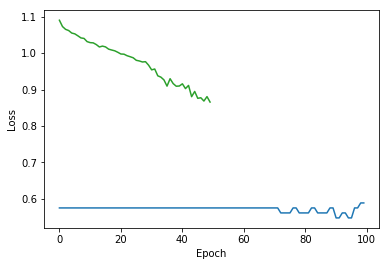

In [13]:
print('Training...')

epochs = 50

accuracy_list = []
training_losses = []
validation_losses = []
with tf.Session() as sess:
    # It is very important the saver is defined INSIDE the block "with tf.Session() as sess"
    # otherwise it will be very difficult to load the graph (unless we name all the variables etc)
    saver = tf.train.Saver()
    
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        for batch_i in range(num_saved_batches - 1):
            for batch_inputarrays, batch_labels in zip(batch_list(load_training_data(batch_i), 
                                                                  size_of_minibatch),
                                                       batch_list(load_training_labels(batch_i), 
                                                                  size_of_minibatch)
                                                      ):
                sess.run(optimizer, feed_dict={x: batch_inputarrays, y: batch_labels, keep_prob: keep_probability})
            (training_cost_value, 
             validation_cost_value, 
             accuracy_value) = get_stats(sess, batch_inputarrays, batch_labels, cost, accuracy, 
                                         printout=True)
            
            print('Epoch {:>2}, Batch {}: {}'.format(epoch + 1, batch_i, accuracy_value))
        
        training_losses.append(training_cost_value)
        validation_losses.append(validation_cost_value)
        accuracy_list.append(accuracy_value)
        
        if epoch % 10 == 0:
            # Save the intermediate model
            save_path = saver.save(sess, savedmodel_path, global_step=epoch)
    
    # Save the final model
    save_path = saver.save(sess, savedmodel_path, global_step=epoch)
        
plt.plot(accuracy_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(training_losses)
plt.plot(validation_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

#### Fine-tune a trained model

In [ ]:
# Decrease the learning rate for the final part!

epochs = 50
load_model = savedmodel_path + "-49"

# read off the epoch from the number in load_model
next_epoch = int(load_model[load_model.rfind("-")+1:]) + 1

accuracy_list = []
training_losses = []
validation_losses = []
with tf.Session() as sess:
    
    saver = tf.train.Saver()
    
    saver.restore(sess, load_model)
    print(sess.run(accuracy, feed_dict={x: validation_inputarray,
                                        y: validation_labels, keep_prob:1.0}))
    
    # Training cycle
    for epoch in range(next_epoch, next_epoch + epochs):
        for batch_i in range(num_saved_batches - 1):
            for batch_inputarrays, batch_labels in zip(batch_list(load_training_data(batch_i), 
                                                                  size_of_minibatch),
                                                       batch_list(load_training_labels(batch_i), 
                                                                  size_of_minibatch)
                                                      ):
                sess.run(optimizer, feed_dict={x: batch_inputarrays, y: batch_labels, 
                                                  keep_prob: keep_probability})
            
            (training_cost_value, 
             validation_cost_value, 
             accuracy_value) = get_stats(sess, batch_inputarrays, batch_labels, cost, accuracy, 
                                         printout=True)
            
            print('Epoch {:>2}, Batch {}: {}'.format(epoch + 1, batch_i, accuracy_value))
        
        training_losses.append(training_cost_value)
        validation_losses.append(validation_cost_value)
        accuracy_list.append(accuracy_value)
        
        if epoch % 10 == 0:
            # Save the intermediate model
            ###save_path = saver.save(sess, "./trained_model", global_step=epoch)
            save_path = saver.save(sess, savedmodel_path, global_step=epoch)
            
    # Save the final model
    ###save_path = saver.save(sess, "./trained_model", global_step=epoch)
    save_path = saver.save(sess, savedmodel_path, global_step=epoch)
    
plt.plot(accuracy_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(training_losses)
plt.plot(validation_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

0.589041

Training Loss: 0.844501256943
Validation Loss: 0.864791989326
Accuracy (validation): 0.575342476368
Epoch 51, Batch 0: 0.575342476368

Training Loss: 0.819639444351
Validation Loss: 0.863854646683
Accuracy (validation): 0.575342476368
Epoch 51, Batch 1: 0.575342476368

Training Loss: 0.8454631567
Validation Loss: 0.861890733242
Accuracy (validation): 0.575342476368
Epoch 51, Batch 2: 0.575342476368

Training Loss: 0.930735170841
Validation Loss: 0.860491633415
Accuracy (validation): 0.575342476368
Epoch 51, Batch 3: 0.575342476368

Training Loss: 0.856955051422
Validation Loss: 0.859154582024
Accuracy (validation): 0.547945201397
Epoch 51, Batch 4: 0.547945201397

Training Loss: 0.831666707993
Validation Loss: 0.858529031277
Accuracy (validation): 0.547945201397
Epoch 51, Batch 5: 0.547945201397

Training Loss: 0.831338226795
Validation Loss: 0.85829859972
Accuracy (validation): 0.575342476368
Epoch 51, Batch 6: 0.575342476368

Training Loss: 0.845690488815
Validation Loss: 0

#### Test model

In [ ]:
load_model = "./trained_model-59"
testing_inputarray = np.load("./testing_data/testing_images.npy")
testing_labels = np.load("./testing_data/testing_labels.npy")

with tf.Session() as sess:
    
    saver = tf.train.Saver()
    
    saver.restore(sess, load_model)
    print("The model's test-set accuracty is {}%".format(np.round(sess.run(accuracy, 
                                                                            feed_dict={x: testing_inputarray,
                                        y: testing_labels, keep_prob:1.0})*100, decimals=2)))